In [241]:
# -- Data Manipulation Libraries
import pandas as pd    
import numpy as np     

# -- Data Visualization Libraries
from matplotlib import pyplot as plt  
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

In [242]:
# -- Machine Learning Libraries
from sklearn.model_selection import train_test_split  # splitting of datasets
from sklearn import feature_selection  # identification and selection of the most important features for machine learning models.
from sklearn import model_selection  # model selection and evaluation
from sklearn.metrics import accuracy_score # comparing the predicted labels to the true labels.
from sklearn.linear_model import LogisticRegression # a linear model used for binary classification tasks.
from sklearn.svm import SVC # [Support Vector Classification], a supervised learning algorithm used for classification tasks, capable of handling linear and non-linear decision boundaries.
from sklearn.naive_bayes import GaussianNB # simple probabilistic classifier based on Bayes there
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Loading regression model
from sklearn.linear_model import LinearRegression

## evealuation metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [243]:
# Loading of datasets
data = pd.read_csv('/Users/mac/Desktop/data science gi-kace/Housing.csv')

In [244]:
data.head() #looking at the first five rows in the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [245]:
data.shape # looking at the number of rows and columns 

(545, 13)

In [246]:
data.describe().round() # descriptive statistics of the dataset

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [247]:
data.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [248]:
data.isna().sum() # looking out for missing values in my dataset

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [249]:
data['furnishingstatus'].unique() # unique values in each column 


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

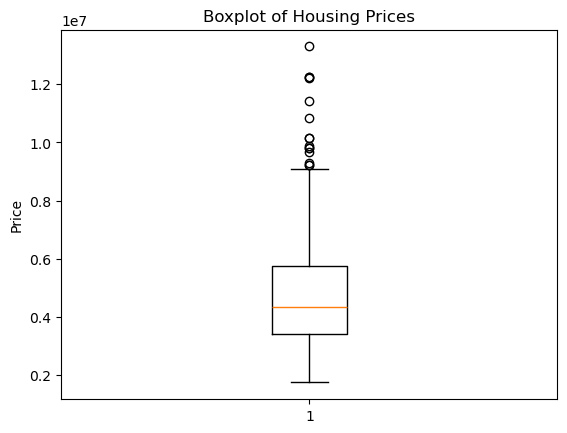

In [250]:

plt.boxplot(data['price'])
plt.title('Boxplot of Housing Prices')
plt.ylabel('Price')
plt.show()

In [251]:
pd.crosstab(data['price'], data['mainroad'], margins=True)

mainroad,no,yes,All
price,,,
1750000,1,2,3
1767150,1,0,1
1820000,0,1,1
1855000,1,0,1
1890000,0,2,2
...,...,...,...
11410000,0,1,1
12215000,0,1,1
12250000,0,2,2


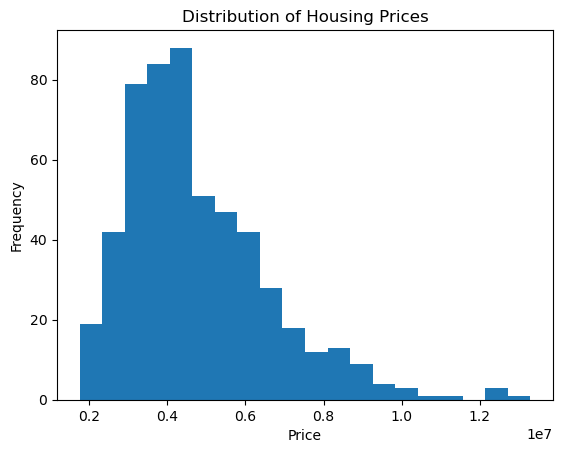

In [252]:
# Distribution of housing price: spread and frequency of different price ranges
# it was observed that the data is skewed to the right
plt.hist(data['price'], bins=20)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [253]:
# a [skew] function was employed to know the degree of skewness of the price column within the data

data['price'].skew()

1.2122388370279802

In [254]:
# it was observed that the prices were more biased to the left
# in order for us to make the data distribution more suitable for machine learning algorithms, the data had to be normalized using the log function

log_price= np.log1p(data['price'])
log_price

0      16.403275
1      16.321037
2      16.321037
3      16.318175
4      16.250001
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 545, dtype: float64

Text(0, 0.5, 'Frequency')

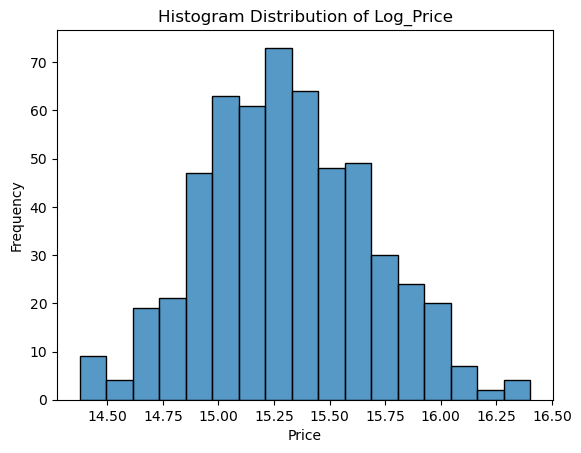

In [255]:
# A Histplot was employed to assess the distribution of the data after normalization
sns.histplot(log_price)
plt.title('Histogram Distribution of Log_Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [256]:
#  Preparing my dataset to be passed through a machine learning algorithm
#  the label of the model is the price of a house
#  all columns = fearures have the tendency to influence the pricing of houses 

data.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [257]:
# the summary of my dataset indicates that some features have a non-numerical values which cant be passed through a machine learning algorithm hence had to be changed into a numeric datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [258]:
# A glance through the data indicates that most of the non-numeric columns had a yes or no response(value)
# Hence in order to generate a numeric column, all yes were replaced with 1 and no with 0 

data['mainroad'] = data['mainroad'].replace({'yes': 1,'no':0})
data['guestroom'] = data['guestroom'].replace({'yes': 1,'no':0})
data['basement'] = data['basement'].replace({'yes': 1,'no':0})
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1,'no':0})
data['airconditioning'] = data['mainroad'].replace({'yes': 1,'no':0})
data['prefarea'] = data['mainroad'].replace({'yes': 1,'no':0})

In [259]:
# in order to verify if the change has been effected, the dataset was called out 

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,furnished
2,12250000,9960,3,2,2,1,0,1,0,1,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,1,2,1,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,1,0,1,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [260]:
# the furnishingstatus column was the only exception with three options: furnished, semifurnished and unfurnished
# I intend to replace furnished = 1, semifurnished = 2 and unfurnished = 3 to generate a numeric column

data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1})

In [261]:
# in order to verify if the change has been effected, the dataset was called out
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,3
2,12250000,9960,3,2,2,1,0,1,0,1,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,1,2,1,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,1,0,1,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


In [262]:
# verifying datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [263]:
corr_matrix= numerical_cols.corr()
corr_matrix['price']

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

<Axes: >

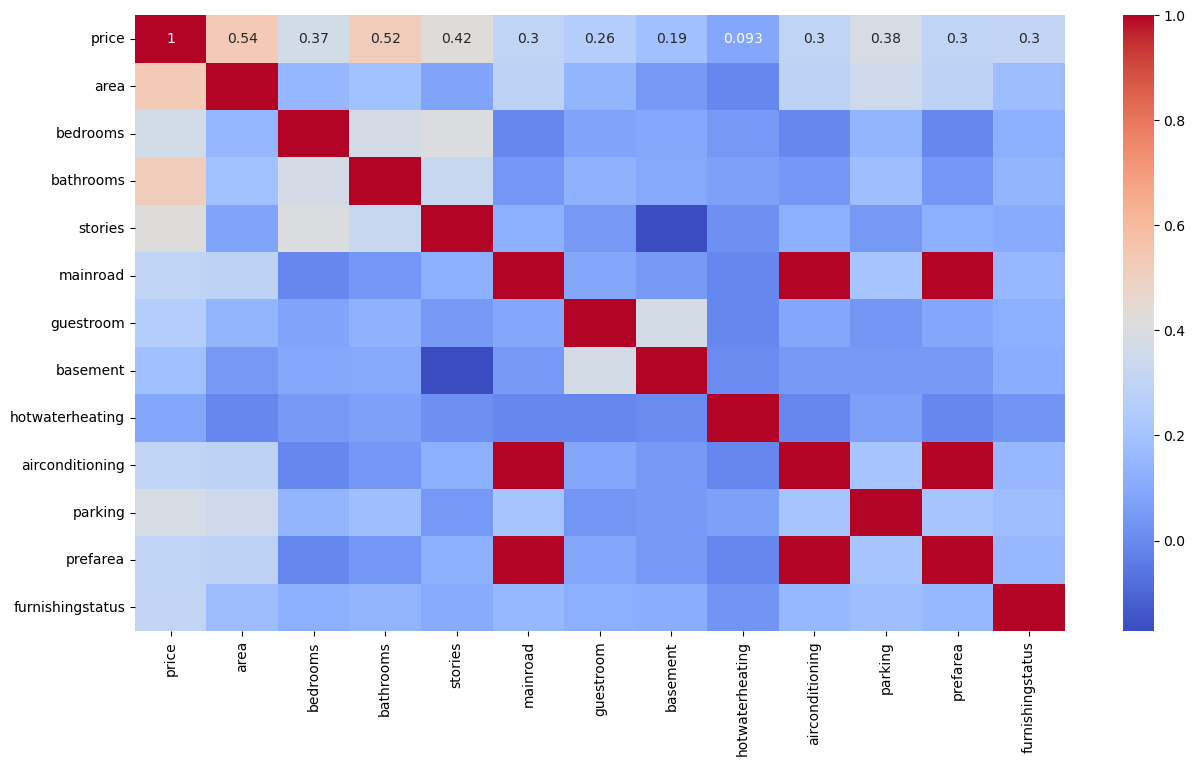

In [282]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [264]:
# Splitting dataset

data_train_full, data_test = train_test_split(data, test_size = 0.2, random_state = 11)
data_train, data_valid = train_test_split(data_train_full, test_size = 0.20, random_state =11)


In [265]:
print(f'Train_Dataset {len(data_train)}')
print(f'Valid_Test {len(data_valid)}')
print(f'Test_Set {len(data_test)}')

Train_Dataset 348
Valid_Test 88
Test_Set 109


In [266]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
42,7700000,6480,3,2,4,1,0,0,0,1,2,1,1
209,4900000,6720,3,1,1,1,0,0,0,1,0,1,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
334,3920000,3290,2,1,1,1,0,0,1,1,1,1,3
433,3290000,3480,4,1,2,0,0,0,0,0,1,0,2


<Axes: >

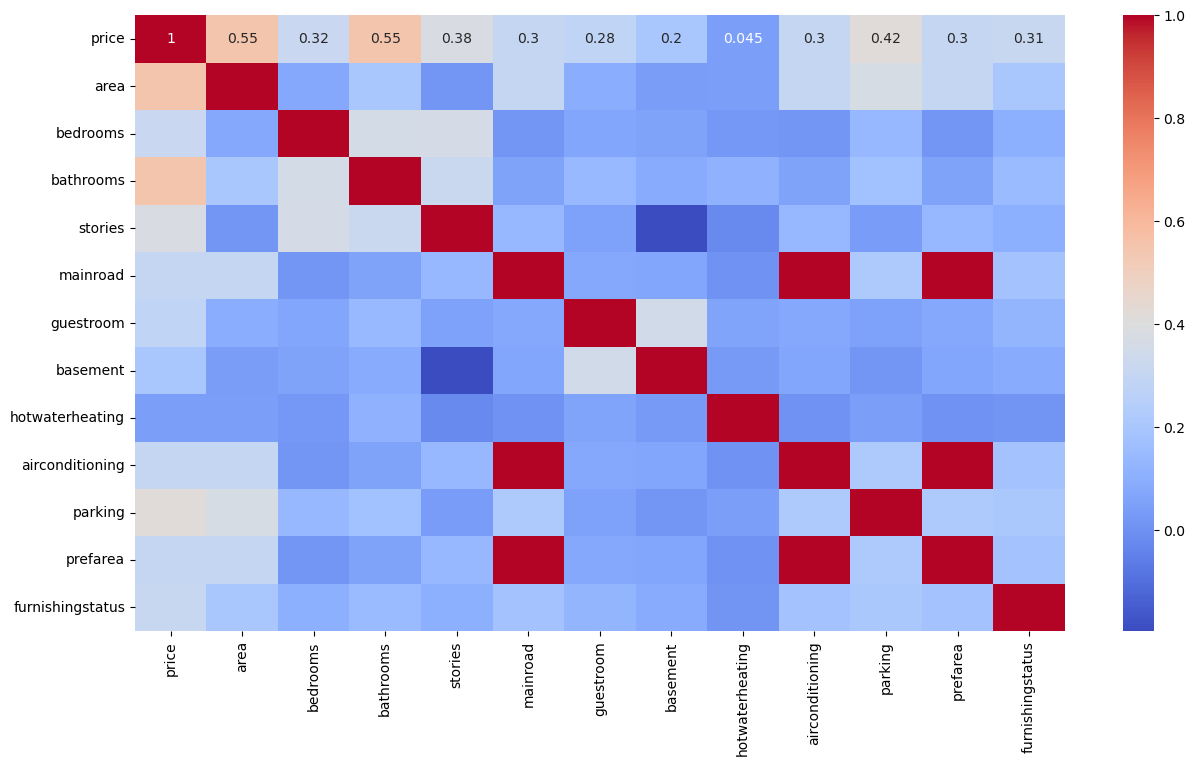

In [267]:
plt.figure(figsize = (15,8))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm')

In [268]:
y_train = np.log1p(data_train['price']).values
y_valid = np.log1p(data_valid['price']).values
y_test = np.log1p(data_test['price']).values
y_train_full = np.log1p(data_train_full['price']).values

In [269]:
y_train

array([15.85673102, 15.40474597, 14.3848792 , 15.18160247, 15.00639843,
       15.90984084, 15.18160247, 15.56296994, 14.85755285, 14.91745097,
       15.67477306, 15.77137118, 15.85673102, 15.04807111, 15.06827381,
       14.79383706, 14.91745097, 15.34590548, 15.82439564, 15.53200772,
       15.81968975, 15.18160247, 15.24222707, 15.57388576, 15.25059532,
       15.36094335, 14.45208792, 14.89392048, 14.95297522, 15.94374238,
       15.40474597, 15.18160247, 15.31513383, 15.48698405, 14.91745097,
       15.28338514, 15.24892726, 15.39035723, 15.06827381, 15.94374238,
       15.14523483, 15.29779691, 15.25059532, 14.98489223, 15.43291684,
       15.02745183, 15.11706396, 15.25059532, 15.4189306 , 15.90501888,
       15.31513383, 14.66779639, 15.97249179, 15.10749451, 15.8337415 ,
       15.40617352, 15.23378821, 15.35345268, 14.91745097, 14.79383706,
       15.77137118, 15.06827381, 15.48038337, 14.98489223, 15.62502825,
       15.00639843, 15.51934933, 14.96291333, 15.96436167, 15.17

In [270]:
# listing out my module features
module_features= ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [271]:
data_train_ml = data_train[module_features]
data_test_ml = data_test[module_features]
data_train_full_ml = data_train_full[module_features]
data_valid_ml = data_valid[module_features]

In [272]:
# extracting my values for module features
data_train_ml.values

array([[6480,    3,    2, ...,    2,    1,    1],
       [6720,    3,    1, ...,    0,    1,    1],
       [2400,    3,    1, ...,    0,    0,    2],
       ...,
       [7000,    3,    1, ...,    0,    1,    1],
       [3650,    3,    2, ...,    2,    1,    2],
       [8875,    3,    1, ...,    1,    1,    2]])

In [273]:
x_train_ml = data_train_ml.values
x_train_ml

array([[6480,    3,    2, ...,    2,    1,    1],
       [6720,    3,    1, ...,    0,    1,    1],
       [2400,    3,    1, ...,    0,    0,    2],
       ...,
       [7000,    3,    1, ...,    0,    1,    1],
       [3650,    3,    2, ...,    2,    1,    2],
       [8875,    3,    1, ...,    1,    1,    2]])

In [274]:
model = LinearRegression()
model.fit(x_train_ml, y_train)

LinearRegression()

In [275]:
data_valid_ml= data_valid[module_features]
data_valid_ml

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
409,3185,2,1,1,1,0,0,0,1,2,1,1
149,6600,4,2,1,1,0,1,0,1,0,1,2
332,5500,4,1,2,1,1,1,0,1,0,1,2
215,4160,3,1,3,1,0,0,0,1,0,1,1
13,3500,4,2,2,1,0,0,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
473,8050,2,1,1,1,0,0,0,1,0,1,1
102,5500,3,2,4,1,1,0,0,1,1,1,2
374,3520,2,2,1,1,0,1,0,1,0,1,2
400,3512,2,1,1,1,0,0,0,1,1,1,1


In [276]:
x_valid_ml = data_valid_ml.values
x_valid_ml

array([[3185,    2,    1, ...,    2,    1,    1],
       [6600,    4,    2, ...,    0,    1,    2],
       [5500,    4,    1, ...,    0,    1,    2],
       ...,
       [3520,    2,    2, ...,    0,    1,    2],
       [3512,    2,    1, ...,    1,    1,    1],
       [6000,    3,    1, ...,    1,    1,    2]])

In [277]:
y_valid_pred = model.predict(x_valid_ml)
y_valid_pred

array([15.00054462, 15.51688088, 15.50316862, 15.18887872, 15.45691059,
       15.32131198, 15.08928422, 15.5910457 , 15.36013761, 15.41851013,
       15.44141521, 14.93112641, 15.59609436, 15.32649025, 15.8516436 ,
       14.95938403, 15.50963309, 15.54792047, 14.94681467, 15.06291435,
       15.50517923, 15.02561213, 15.16402944, 15.30775462, 15.04482136,
       15.61843239, 15.07363932, 15.42744662, 15.8256605 , 15.46739167,
       15.78305476, 15.73919163, 15.02690626, 15.98565432, 15.20995929,
       15.09843905, 15.01508501, 15.22601242, 15.63787674, 15.49220764,
       15.04804618, 15.10136013, 15.08881124, 14.88647896, 15.33156978,
       15.2096226 , 15.61229862, 15.55388666, 14.93327051, 15.24656557,
       15.74099965, 15.29400319, 15.38308764, 15.09313799, 15.35922829,
       15.15997403, 15.7981359 , 15.71169641, 15.52914129, 15.17767936,
       15.26259646, 15.05377272, 15.25580106, 15.10259538, 14.85611005,
       14.94905581, 15.22554456, 16.01300812, 14.98529142, 15.17

In [278]:
acc_score = model.score(x_valid_ml, y_valid)
acc_score

0.5629996247756521

In [279]:
rsquared_acc= r2_score(y_valid, y_valid_pred)
rsquared_acc

0.5629996247756521

In [283]:
data_test_ml = data_test[module_features]
data_test_ml
x_test_ml = data_test_ml.values
x_test_ml

array([[5400,    4,    2, ...,    2,    1,    1],
       [3000,    3,    2, ...,    0,    1,    3],
       [5960,    3,    1, ...,    0,    1,    1],
       ...,
       [3630,    2,    1, ...,    0,    1,    3],
       [3630,    2,    1, ...,    0,    1,    1],
       [6000,    3,    2, ...,    0,    1,    2]])

In [284]:
y_test_pred = model.predict(x_test_ml)
y_test_pred

array([15.49011914, 15.55725458, 15.45120075, 15.44012566, 15.73351651,
       15.90850287, 14.7544923 , 15.55952091, 15.82834618, 14.94712893,
       15.17521794, 14.98077628, 15.22606142, 15.15007966, 14.96689305,
       15.68431886, 15.55508535, 15.20611832, 15.25298014, 15.32749131,
       14.87554929, 15.03351204, 14.9139832 , 15.95666289, 15.26965438,
       15.19536981, 14.86965528, 15.08879693, 15.21970761, 15.0121825 ,
       15.08945831, 15.23523622, 15.35874281, 15.10653664, 15.06770419,
       14.95766005, 15.41295357, 14.90307311, 15.08304992, 15.75271516,
       15.07229549, 16.12866988, 15.38490428, 15.848946  , 15.60678523,
       15.80327106, 15.3490301 , 15.30614014, 15.58832436, 15.19082405,
       14.96513133, 15.25111289, 14.87011394, 15.6635318 , 15.73863846,
       15.12293157, 15.38207518, 15.01505233, 15.33301059, 14.9548937 ,
       15.28972477, 15.46642178, 14.76031588, 15.00393445, 15.20442258,
       15.13118825, 14.97258166, 15.64810806, 14.98647401, 15.45

In [280]:
# comparing rhe two values indicates that there was an accurate prediction

In [281]:
#Naive Bayes
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(x_train, y_train)
nbg_pred = naive_bayes_gaussian.predict(x_test)
nbg_accuracy = accuracy_score(y_test , nbg_pred)*100
nbg_accuracy

NameError: name 'x_train' is not defined